# Set up Python

## Install what hasn't been installed yet

In [2]:
!pip install nbformat>=4.2.0

In [3]:
!pip install plotly

In [4]:
#!pip install ydata_profiling

## Import necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics import pairwise_distances, silhouette_score
import seaborn as sns
import plotly.graph_objects as go
import nbformat
#from ydata_profiling import ProfileReport

# Start ML Process

## 1. Import & Clean Data

In [6]:
url = "dataset"
path = "dataset"+url.split("/")[-2]
spotify_5000_df = pd.read_csv(path)

In [7]:
# Import Data
#spotify_5000_df = pd.read_csv('C:/Users/anna_/Desktop/Bootcamp/08_Unsupervised_Machine_Learning/02_Data/3_spotify_5000_songs.csv')
spotify_5000_df.head(5)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [8]:
# check column name
print(spotify_5000_df.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [9]:
#clean columns
spotify_5000_df.columns = spotify_5000_df.columns.str.strip()
print(spotify_5000_df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


In [10]:
spotify_5000_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   name              5235 non-null   object 
 2   artist            5235 non-null   object 
 3   danceability      5235 non-null   float64
 4   energy            5235 non-null   float64
 5   key               5235 non-null   int64  
 6   loudness          5235 non-null   float64
 7   mode              5235 non-null   int64  
 8   speechiness       5235 non-null   float64
 9   acousticness      5235 non-null   float64
 10  instrumentalness  5235 non-null   float64
 11  liveness          5235 non-null   float64
 12  valence           5235 non-null   float64
 13  tempo             5235 non-null   float64
 14  type              5235 non-null   object 
 15  duration_ms       5235 non-null   int64  
 16  time_signature    5235 non-null   int64  


In [11]:
# create combined index for identification
spotify_5000_df['combined_index'] = spotify_5000_df['name']+'-'+spotify_5000_df['artist']
spotify_5000_df.set_index('combined_index',inplace=True)

In [12]:
# drop column that won't be needed (non numerical)']).
clean_spotify_df = spotify_5000_df.drop(columns=['Unnamed: 0','name','artist','id','html','duration_ms','type','mode','loudness','time_signature']).copy()

In [13]:
# check duplicates & drop if necessary
clean_spotify_df.duplicated().sum()

76

In [14]:
clean_spotify_df = clean_spotify_df.drop_duplicates().copy()

## 2. EDA (Exploarytory Data Analysis)

In [15]:
clean_spotify_df.describe()

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,0.507343,0.653258,5.261097,0.083119,0.291500,0.260760,0.185348,0.442103,118.660820
std,0.218154,0.289571,3.571333,0.070979,0.356949,0.372000,0.149290,0.278031,28.607058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306000,0.475000,2.000000,0.038900,0.002260,0.000001,0.092500,0.195000,96.069500
50%,0.536000,0.738000,5.000000,0.055700,0.096200,0.002230,0.125000,0.414000,119.011000
75%,0.686000,0.895000,8.000000,0.098800,0.570500,0.658000,0.236500,0.676000,134.054000
max,0.967000,1.000000,11.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000


In [16]:
clean_spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5159 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                      -Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                           -Maurice Ravel                                   
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5159 non-null   float64
 1   energy            5159 non-null   float64
 2   key               5159 non-null   int64  
 3   speechiness       5159 non-null   float64
 4   acousticness      5159 non-null   float64
 5   instrumentalness  5159 non-null   float64
 6   liveness          5159 non-null   float64
 7   valence           5159 non

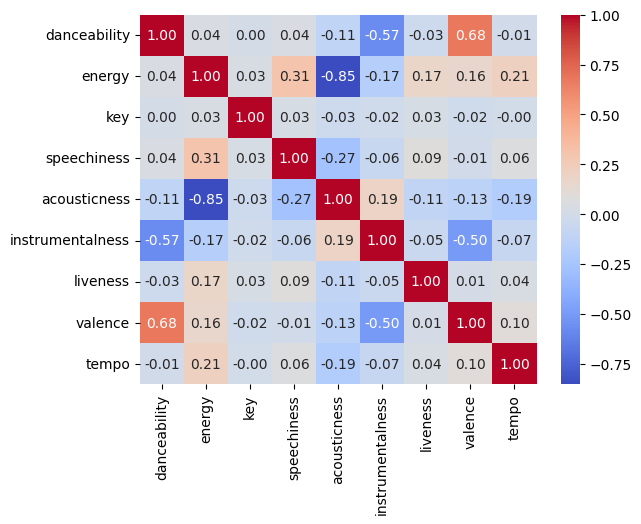

In [17]:
# correlation
correlation_matrix = clean_spotify_df.corr()
(sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f'));

## 3. Scale Data/Preprocessing

In [18]:
# scale ranges vary with MinMAX, not changing distribution
scaler_minmax = MinMaxScaler().set_output(transform='pandas')
spotify_5000_minmax = scaler_minmax.fit_transform(clean_spotify_df)
spotify_5000_minmax

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
combined_index,,,,,,,,,
Se Eu Quiser Falar Com Deus -Gilberto Gil,0.680455,0.25900,1.000000,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia -Antônio Carlos Jobim,0.767322,0.39900,0.181818,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente -Martinho Da Vila",0.880041,0.73000,0.181818,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei -Chico César,0.729059,0.05020,0.363636,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena -Kurt Elling,0.673216,0.11900,0.545455,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 -Pyotr Ilyich Tchaikovsky",0.208893,0.06940,0.272727,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique -Tristan Murail",0.194416,0.10100,0.545455,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) -Arnold Schoenberg",0.061634,0.00093,0.818182,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [19]:
spotify_5000_minmax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5159 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                      -Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                           -Maurice Ravel                                   
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5159 non-null   float64
 1   energy            5159 non-null   float64
 2   key               5159 non-null   float64
 3   speechiness       5159 non-null   float64
 4   acousticness      5159 non-null   float64
 5   instrumentalness  5159 non-null   float64
 6   liveness          5159 non-null   float64
 7   valence           5159 non

In [20]:
# check duplicates & drop if necessary
spotify_5000_minmax.duplicated().sum()

0

## 4. Decide on Clustering

In [21]:
# intertia & elbow to find k (number of clusters)
seed = 42
max_k = 100
inertia_list = []

for i in range(1,max_k +1):
    spotifiy_5000_KMeans = KMeans(n_clusters = i,
                                  n_init = 'auto',
                                  random_state= seed)
    spotifiy_5000_KMeans.fit(spotify_5000_minmax)
    inertia_list.append(spotifiy_5000_KMeans.inertia_)


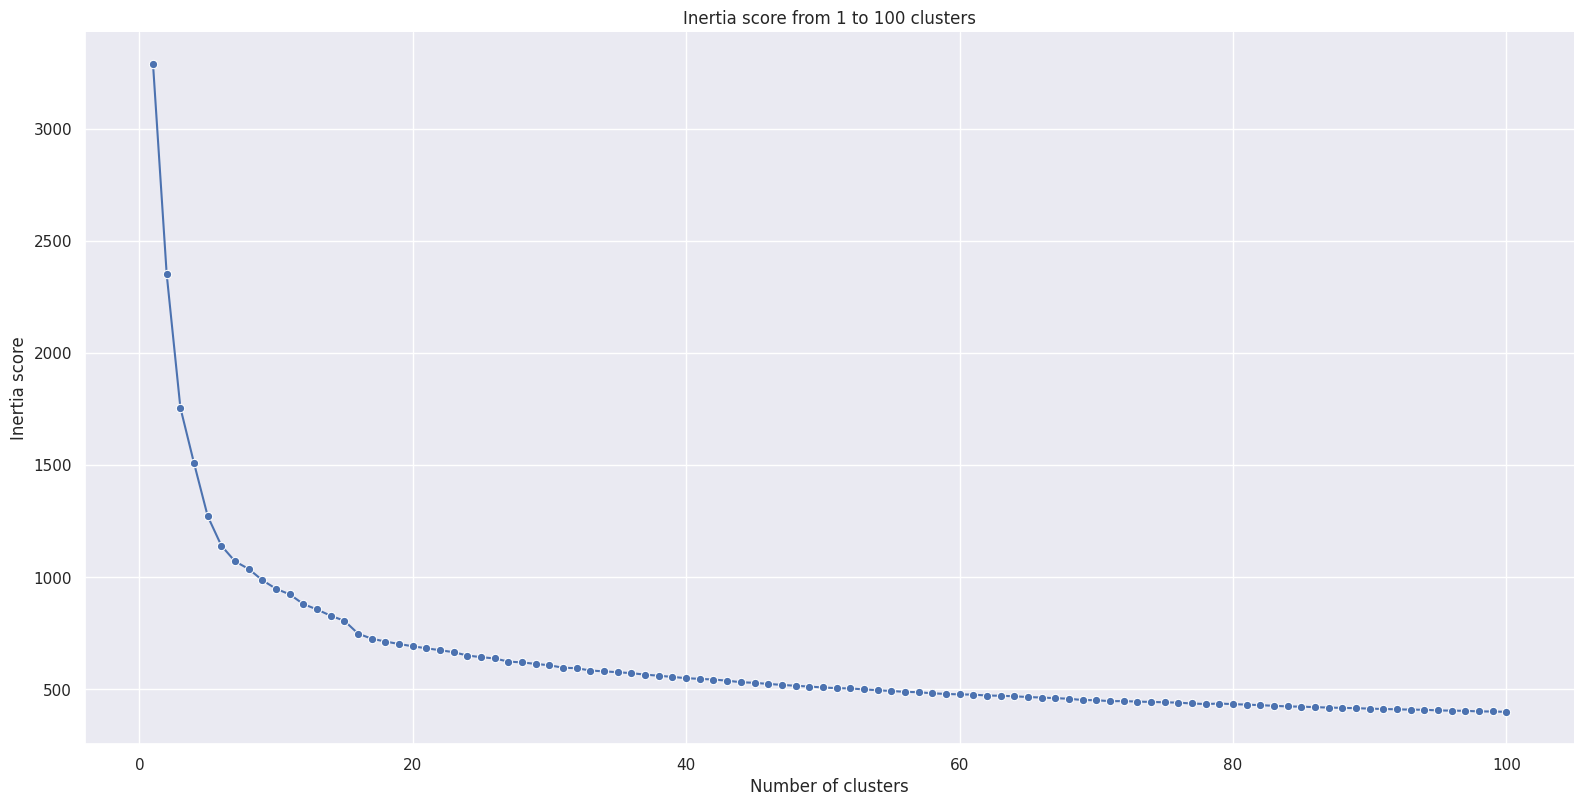

In [22]:
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [23]:
# get the silhouette_score
sil_scores = []

for j in range(2,max_k):
    spotifiy_5000_KMeans_2 = KMeans(n_clusters= j,
                                    n_init = 'auto',
                                    random_state= seed)
    spotifiy_5000_KMeans_2.fit(spotify_5000_minmax)
    labels = spotifiy_5000_KMeans_2.labels_
    score = silhouette_score(spotify_5000_minmax,labels)
    sil_scores.append(score)

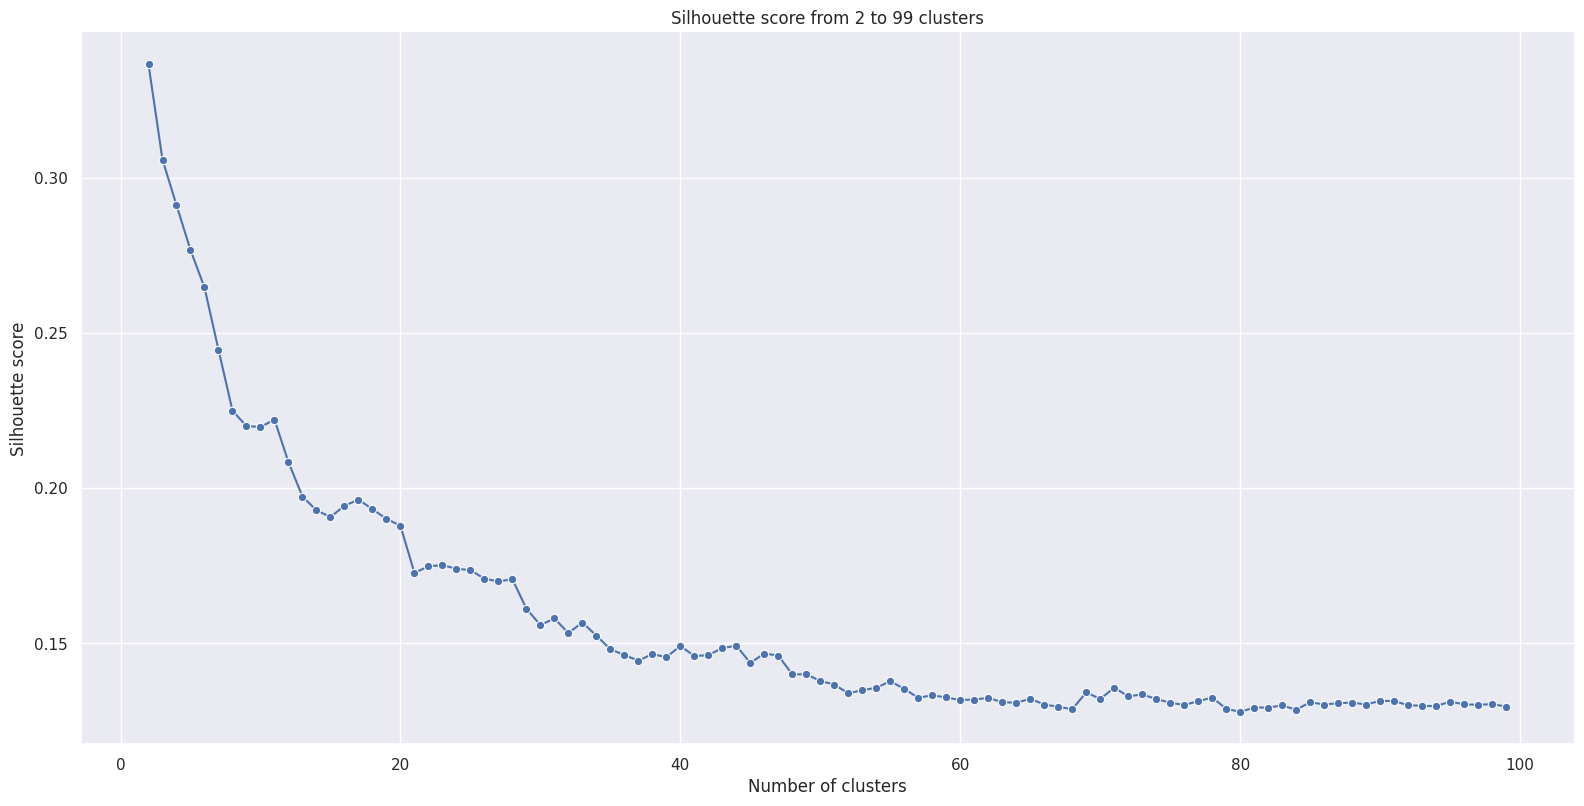

In [24]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

## 5. Run Algorithm

K-means clustering is an iterative algorithm that tries to partition a dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The algorithm minimises the distance between data points within a cluster and maximises the distance between data points in different clusters.

In [25]:
# initializae the model
spotify_kmeans = KMeans(n_clusters = 53,
                        random_state= seed)

spotify_kmeans.fit(spotify_5000_minmax)

clusters = spotify_kmeans.labels_

spotify_5000_minmax['playlist'] = clusters

In [26]:
spotify_5000_minmax.groupby(by='playlist').mean()

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
playlist,,,,,,,,,
0,0.401719,0.121173,0.770248,0.052841,0.955075,0.892247,0.119778,0.188349,0.626197
1,0.466196,0.578304,0.310935,0.056380,0.150107,0.029020,0.154672,0.239779,0.578594
2,0.279448,0.883145,0.570437,0.092159,0.003716,0.863897,0.181163,0.328423,0.566421
3,0.796317,0.739936,0.534530,0.104750,0.084384,0.011725,0.144966,0.810915,0.529530
4,0.602664,0.228421,0.800239,0.055879,0.861010,0.048852,0.129259,0.384394,0.554041
5,0.716660,0.714082,0.505566,0.099495,0.417732,0.010305,0.177510,0.834207,0.587984
6,0.564676,0.823835,0.598875,0.102310,0.037494,0.029203,0.142863,0.257417,0.620532
7,0.656331,0.374403,0.069199,0.062199,0.780660,0.041903,0.157025,0.692325,0.500450
8,0.440947,0.856826,0.181818,0.106554,0.026336,0.029727,0.206577,0.587050,0.696847


In [27]:
spotify_5000_minmax.sort_values(by='playlist')

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist
combined_index,,,,,,,,,,
All of Me -Henry Smith,0.518097,0.0775,0.727273,0.049564,0.993976,0.964467,0.119554,0.134010,0.594953,0
A Calling -Goldbæk,0.432265,0.0258,0.727273,0.054466,0.986948,0.883249,0.109422,0.254822,0.625716,0
Imprimis Obscurity -Broken Hope,0.403309,0.1060,0.909091,0.082898,0.813253,0.517766,0.141844,0.292386,0.932964,0
Rasch Und Mäßig Bewegt -Asmus Tietchens,0.092761,0.3830,1.000000,0.036928,0.964859,0.832487,0.352584,0.210152,0.813758,0
Fredag -Søndag Søndag,0.614271,0.0180,1.000000,0.047277,0.996988,0.924873,0.123607,0.169543,0.589046,0
...,...,...,...,...,...,...,...,...,...,...
Sunshine -David Guetta,0.610134,0.8000,0.090909,0.047603,0.000643,0.915736,0.051874,0.222335,0.598131,52
Byte -Martin Garrix,0.617373,0.9310,0.636364,0.035839,0.000639,0.833503,0.060081,0.271066,0.598304,52
Dynamo - Original Mix -Laidback Luke,0.665977,0.9060,0.000000,0.087691,0.003946,0.959391,0.197568,0.099086,0.602837,52


## 6. Add playlistnumber to Original DataFrame

In [28]:
# add playlist to original DataFrame
playlist_df = spotify_5000_minmax[['playlist']].copy()
playlist_df.head(5)

,playlist
combined_index,
Se Eu Quiser Falar Com Deus -Gilberto Gil,30
Saudade De Bahia -Antônio Carlos Jobim,27
"Canta Canta, Minha Gente -Martinho Da Vila",44
Mulher Eu Sei -Chico César,39
Rosa Morena -Kurt Elling,4


In [29]:
spotify_5000_w_playlist = spotify_5000_df.merge(playlist_df, on='combined_index', how='left')
spotify_5000_w_playlist.head(5)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,playlist
combined_index,,,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus -Gilberto Gil,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,30.0
Saudade De Bahia -Antônio Carlos Jobim,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,27.0
"Canta Canta, Minha Gente -Martinho Da Vila",2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,44.0
"Canta Canta, Minha Gente -Martinho Da Vila",2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,25.0
Mulher Eu Sei -Chico César,3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,39.0


In [30]:
# check duplicates & drop if necessary
spotify_5000_w_playlist.duplicated().sum()


74

In [31]:
spotify_5000_w_playlist = spotify_5000_w_playlist.drop_duplicates().copy()

In [32]:
spotify_w_playlist_clean = spotify_5000_w_playlist.drop(columns = ['Unnamed: 0','name','artist','type']).copy()
spotify_w_playlist_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5263 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                      -Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                           -Maurice Ravel                                   
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5263 non-null   float64
 1   energy            5263 non-null   float64
 2   key               5263 non-null   int64  
 3   loudness          5263 non-null   float64
 4   mode              5263 non-null   int64  
 5   speechiness       5263 non-null   float64
 6   acousticness      5263 non-null   float64
 7   instrumentalness  5263 no

## 7. Only show Data for one playlist

In [33]:
#how many songs are there in each playlist?
spotify_w_playlist_clean['playlist'].value_counts()

,count
playlist,
3.0,244
25.0,187
14.0,163
41.0,157
11.0,155
17.0,152
33.0,148
10.0,142
22.0,137


In [34]:
#only show one playlist

playlist = 30

spotify_playlist_30 = spotify_w_playlist_clean.loc[spotify_w_playlist_clean['playlist'] == playlist]
spotify_playlist_30.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,playlist
combined_index,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus -Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,30.0
Rosa Morena - Live At Carnegie Hall/1964 -Stan Getz,0.529,0.134,7,-26.821,1,0.0869,0.906,0.121000,0.694,0.474,133.614,244627,4,37H0kOistSqxRH8rObQeIe,https://open.spotify.com/track/37H0kOistSqxRH8...,30.0
Á Primeira Vista -Chico César,0.542,0.148,11,-12.990,1,0.0394,0.782,0.000000,0.704,0.248,89.585,216800,4,2hjDxNmryN9ziHAIYiRksM,https://open.spotify.com/track/2hjDxNmryN9ziHA...,30.0
"Sabor Colorido / Moça Bonita -Elomar, Geraldo Azevedo, Vital Farias, Xangai",0.517,0.226,5,-17.795,1,0.0581,0.808,0.000005,0.697,0.525,78.868,258400,4,2ctBnKIGC5KoWUg8reeCTL,https://open.spotify.com/track/2ctBnKIGC5KoWUg...,30.0
Shimbalaiê - Live -Caetano Veloso,0.567,0.179,9,-14.674,0,0.0317,0.819,0.000015,0.901,0.390,78.577,201387,4,4Q3nQek3cWJqlRVPrvsbdJ,https://open.spotify.com/track/4Q3nQek3cWJqlRV...,30.0


In [35]:
#only show one playlist

playlist = 3

spotify_playlist_3 = spotify_w_playlist_clean.loc[spotify_w_playlist_clean['playlist'] == playlist]
spotify_playlist_3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,playlist
combined_index,,,,,,,,,,,,,,,,
Mas Que Nada -Rio Combo,0.618,0.539,5,-12.689,0,0.0312,0.156000,0.002140,0.1870,0.916,88.646,178880,4,51P5Djwsur61UY4oitktOQ,https://open.spotify.com/track/51P5Djwsur61UY4...,3.0
Agua De Beber -Sophie Milman,0.660,0.759,7,-8.550,1,0.0437,0.243000,0.002270,0.0756,0.700,94.477,235800,4,4ic2XfSYoMch7DrdNf2T3N,https://open.spotify.com/track/4ic2XfSYoMch7Dr...,3.0
Alegria -Batida,0.715,0.691,7,-8.953,1,0.0869,0.003310,0.218000,0.1320,0.747,136.015,215480,4,1K3JwmUeXS2g8OpRhtxtDO,https://open.spotify.com/track/1K3JwmUeXS2g8Op...,3.0
Tirei o Chapéu -Batida,0.725,0.927,7,-7.336,1,0.0795,0.000544,0.000000,0.0432,0.823,135.062,213427,4,1NC2mfagQJAUejZNuMernG,https://open.spotify.com/track/1NC2mfagQJAUejZ...,3.0
In Your Hands -Charlie Winston,0.764,0.616,6,-7.928,1,0.0377,0.203000,0.007710,0.0824,0.873,107.718,231480,4,4cUMknaJSsOreRHSGfA1W8,https://open.spotify.com/track/4cUMknaJSsOreRH...,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guerrera -DELLAFUENTE,0.760,0.605,6,-6.122,1,0.0520,0.165000,0.000000,0.1850,0.644,115.090,208696,4,3Q6zROQvMXRtR9NYfDpNWL,https://open.spotify.com/track/3Q6zROQvMXRtR9N...,3.0
Picky -Joey Montana,0.783,0.748,8,-4.683,1,0.0892,0.147000,0.000000,0.1730,0.806,93.222,182747,4,4tPL9PeVZY4c0jUPtSD5nx,https://open.spotify.com/track/4tPL9PeVZY4c0jU...,3.0
Hope -Jonathan Traylor,0.868,0.761,5,-4.322,1,0.0628,0.040300,0.000011,0.1150,0.669,118.962,209951,4,3GC7jZ05UuZVPNy2JMgPHf,https://open.spotify.com/track/3GC7jZ05UuZVPNy...,3.0


## Radar time playlist 3 and 30

In [36]:
import plotly.graph_objects as go

# Group data by playlist and calculate the mean values for each feature
playlist_means = spotify_5000_minmax.groupby('playlist').mean().reset_index()

# Define categories for the radar chart (numerical features)
categories = ['acousticness', 'danceability', 'energy', 'instrumentalness',
              'liveness', 'speechiness', 'valence', 'tempo', 'key']

# Create scatter polar objects for each playlist
scatter_objects = []
for playlist in playlist_means['playlist'].unique():
    playlist_data = playlist_means[playlist_means['playlist'] == playlist][categories].values.tolist()[0]
    scatter_objects.append(
        go.Scatterpolar(
            r=playlist_data,  # Radial coordinates
            theta=categories,  # Feature names
            fill='toself',  # Fill the area
            name=f'Cluster {playlist}'  # Playlist name
        )
    )

# Create the radar chart figure
fig = go.Figure()
fig.add_traces(scatter_objects)

# Update layout for better visualization
fig.update_layout(
    title_text='Radar Chart of Music Preferences by Cluster',
    height=600,
    width=800,
    polar=dict(
        radialaxis=dict(
            visible=True,  # Show radial axis values
            range=[0, 1]  # Adjust range if needed
        )
    ),
    showlegend=True  # Display legend
)

# Show the radar chart
fig.show()

Create scatter polar objects: The code iterates through each playlist, retrieves the mean values for the specified categories, and creates a Scatterpolar object for each playlist. These objects define the individual radar plots for each playlist.

In [37]:
import plotly.graph_objects as go

# Group data by playlist and calculate the mean values for each feature
playlist_means = spotify_5000_minmax.groupby('playlist').mean().reset_index()

# Define categories for the radar chart (numerical features)
categories = ['acousticness', 'danceability', 'energy', 'instrumentalness',
              'liveness', 'speechiness', 'valence', 'tempo', 'key']

# Filter playlist_means for playlists 3 and 30
filtered_playlist_means = playlist_means[playlist_means['playlist'].isin([3, 30])]

# Create scatter polar objects for the filtered playlists
scatter_objects = []
for playlist in filtered_playlist_means['playlist'].unique():
    playlist_data = filtered_playlist_means[filtered_playlist_means['playlist'] == playlist][categories].values.tolist()[0]
    scatter_objects.append(
        go.Scatterpolar(
            r=playlist_data,  # Radial coordinates
            theta=categories,  # Feature names
            fill='toself',  # Fill the area
            name=f'Cluster {playlist}'  # Playlist name
        )
    )

# Create the radar chart figure
fig = go.Figure()
fig.add_traces(scatter_objects)

# Update layout for better visualization
fig.update_layout(
    title_text='Radar Chart of Music Preferences for Clusters 3 and 30',
    height=600,
    width=800,
    polar=dict(
        radialaxis=dict(
            visible=True,  # Show radial axis values
            range=[0, 1]  # Adjust range if needed
        )
    ),
    showlegend=True  # Display legend
)

# Show the radar chart
fig.show()